In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds['cut'] = diamonds['cut'].cat.codes

diamonds['color'] = diamonds['color'].astype('category')
diamonds['color'] = diamonds['color'].cat.codes

diamonds['clarity'] = diamonds['clarity'].astype('category')
diamonds['clarity'] = diamonds['clarity'].cat.codes

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,6,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds.corr()['price']

carat      0.921591
cut        0.053491
color      0.172511
clarity    0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [6]:
from copy import deepcopy

carat = diamonds['carat']
diamonds = diamonds.drop(['cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z' ], axis=1)
diamonds['carat'] = carat
diamonds

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [7]:
X = diamonds[['carat']].values.reshape(-1, 1)
y = diamonds[['price']].values

In [8]:
diamonds[['carat']].value_counts()

carat
0.30     2604
0.31     2249
1.01     2242
0.70     1981
0.32     1840
         ... 
2.77        1
2.71        1
2.70        1
2.67        1
5.01        1
Name: count, Length: 273, dtype: int64

In [9]:
diamonds[['price']].value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
9510       1
9507       1
9504       1
9503       1
18823      1
Name: count, Length: 11602, dtype: int64

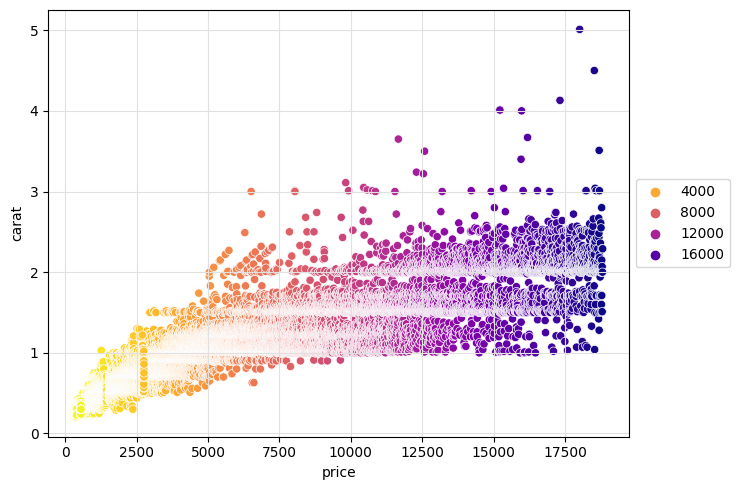

In [10]:
plt.figure(figsize=(7.5,5))
scatter = sns.scatterplot(x='price', y='carat', data=diamonds, hue='price', palette='plasma_r')
plt.grid(True, color='#e2e0e0')

scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.tight_layout()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1242)

In [12]:
X_train.shape, y_train.shape

((43152, 1), (43152, 1))

### Linear Regression

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
reg.score(X_train, y_train)

0.8495357506168062

In [15]:
reg.score(X_test, y_test)

0.8484825453008448

In [16]:
y_pred = reg.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print('The mean squared error is:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('The mean absolute error is:', mae)

r2 = r2_score(y_test, y_pred)
print('The R-squared is:', r2)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear RMSE: {rmse}")

The mean squared error is: 2383108.010833499
The mean absolute error is: 998.9980081981627
The R-squared is: 0.8484825453008448
Linear RMSE: 1543.7318455073403


### Ridge Regression

In [18]:
# the mean squared error is so high, ridge and lasso regression is aplicable
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [19]:
y_pred_ridge = ridge.predict(X_test)

In [20]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

mse_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MAE: {mse_ridge}")

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R-squared: {r2_ridge}")

rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f"Ridge RMSE: {rmse_ridge}")

Ridge Regression MSE: 2383045.2796236984
Ridge Regression MAE: 998.5950208347972
Ridge Regression R-squared: 0.8484865337366169
Ridge RMSE: 1543.711527333944


### Lasso Regression

In [21]:
# lasso regression
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [22]:
y_pred_lasso = lasso.predict(X_test)

In [23]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MAE: {mae_lasso}")

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R-squared: {r2_lasso}")

rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"Ridge RMSE: {rmse_lasso}")

Lasso Regression MSE: 2382812.3384129396
Lasso Regression MAE: 994.6345368439589
Lasso Regression R-squared: 0.8485013440847792
Ridge RMSE: 1543.636077063807


### Decision Tree Regressor

In [24]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
tree_predictions = tree_regressor.predict(X_test)

In [26]:
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
print(f"Decision Tree RMSE: {tree_rmse}")

Decision Tree RMSE: 1429.7001718789559


### Random Forest Regressor

In [27]:
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7300\203857230.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
forest_predictions = forest_regressor.predict(X_test)

In [29]:
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)
print(f"Random Forest RMSE: {forest_rmse}")

Random Forest RMSE: 1427.2076323101367


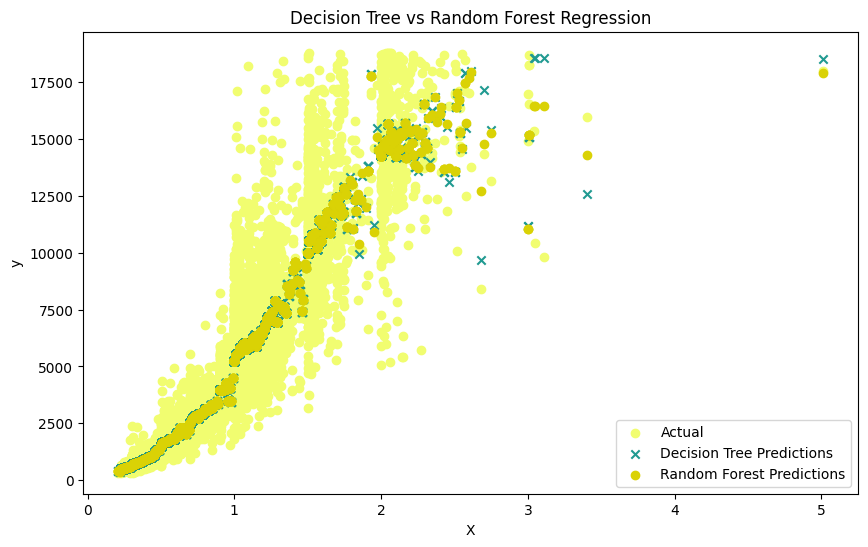

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='#f1fd70', label='Actual')
plt.scatter(X_test, tree_predictions, color='#209a91', marker='x', label='Decision Tree Predictions')
plt.scatter(X_test, forest_predictions, color='#dad205', marker='o', label='Random Forest Predictions')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree vs Random Forest Regression')
plt.legend()
plt.show()

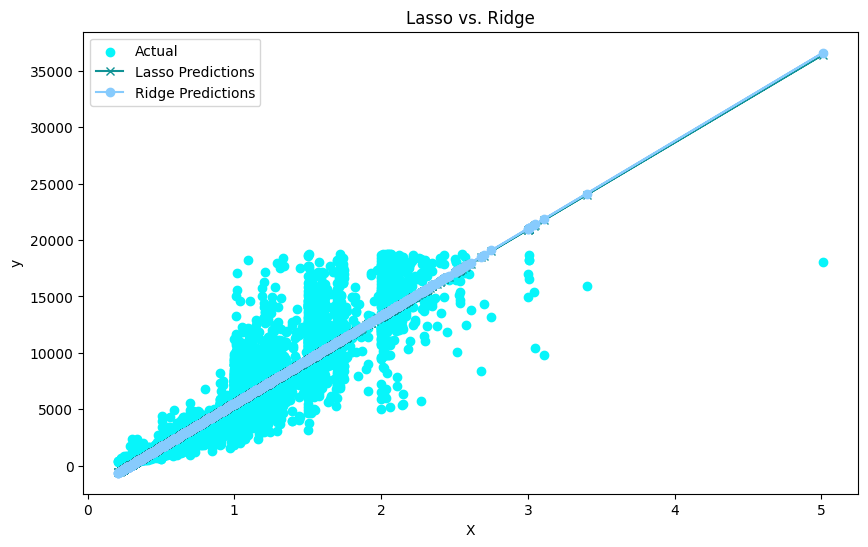

In [32]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='#07f5fa', label='Actual')
plt.plot(X_test, y_pred_lasso, color='#109295', marker='x', label='Lasso Predictions')
plt.plot(X_test, y_pred_ridge, color='#87cbfd', marker='o', label='Ridge Predictions')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso vs. Ridge')
plt.legend()
plt.show()